# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
#nltk.downloader.download('vader_lexicon')

%matplotlib inline

from newsapi import NewsApiClient
load_dotenv()

True

In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
type(api_key)

str

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="bitcoin", language="en", page_size=100)
#btc_news["totalResults"]

In [6]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="ethereum", language="en", page_size=100)
#eth_news["totalResults"]

In [7]:
#btc_news["articles"][0]

In [8]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentimentscore = []

for article in btc_news["articles"]:
    try:
        title = article["title"]
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentimentscore.append({
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Text": title,
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_ss_df = pd.DataFrame(btc_sentimentscore)

btc_ss_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.3182,0.000,0.909,0.091,"Tesla buys $1.5 in Bitcoin, will soon accept i..."
1,0.3818,0.000,0.929,0.071,Tesla’s $1.5 billion bitcoin purchase clashes ...
2,-0.1027,0.038,0.962,0.000,Would You Trade a Bitcoin for a Tesla?
3,0.2500,0.000,0.944,0.056,Jack Dorsey and Jay Z invest $23.6 million to ...
4,0.6597,0.000,0.863,0.137,"Tesla buys $1.5B in bitcoin, may accept the cr..."


In [9]:
# Create the ethereum sentiment scores DataFrame
eth_sentimentscore = []

for article in eth_news["articles"]:
    try:
        title = article["title"]
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentimentscore.append({
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Text": title,
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_ss_df = pd.DataFrame(eth_sentimentscore)

eth_ss_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.3400,0.119,0.818,0.063,NVIDIA limits RTX 3060 crypto speeds as it int...
1,0.0000,0.000,1.000,0.000,Coinbase is going public via direct listing
2,0.0000,0.000,1.000,0.000,Ethereum scales record peak before futures lau...
3,0.0000,0.000,1.000,0.000,Cryptocurrency Ethereum hits record high ahead...
4,0.0258,0.000,0.970,0.030,Remastered 'nyan cat' art sells for the equiva...


In [10]:
# Describe the Bitcoin Sentiment
btc_ss_df.describe()

,Compound,Negative,Neutral,Positive
count,94.000000,94.000000,94.000000,94.000000
mean,0.164445,0.027223,0.903596,0.069160
std,0.390611,0.051505,0.083115,0.072163
min,-0.844200,0.000000,0.645000,0.000000
25%,0.000000,0.000000,0.854250,0.000000
50%,0.073000,0.000000,0.923000,0.058000
75%,0.480525,0.048500,0.964250,0.106250
max,0.921700,0.227000,1.000000,0.353000


In [11]:
# Describe the Ethereum Sentiment
eth_ss_df.describe()

,Compound,Negative,Neutral,Positive
count,92.000000,92.000000,92.000000,92.000000
mean,0.156025,0.026065,0.909304,0.064630
std,0.385367,0.048525,0.085429,0.077169
min,-0.709600,0.000000,0.667000,0.000000
25%,0.000000,0.000000,0.855000,0.000000
50%,0.000000,0.000000,0.921500,0.046500
75%,0.493900,0.015000,1.000000,0.101750
max,0.900100,0.175000,1.000000,0.333000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest negative score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

In [13]:
lemmatizer = WordNetLemmatizer()

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = stopwords.words('english')
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub('', text)
    # Remove the stop words
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens


In [15]:
# Create a new tokens column for bitcoin
btc_ss_df["Tokens"] = btc_ss_df["Text"].apply(tokenizer)
btc_ss_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.3182,0.000,0.909,0.091,"Tesla buys $1.5 in Bitcoin, will soon accept i...","[tesla, buy, bitcoin, soon, accept, payment]"
1,0.3818,0.000,0.929,0.071,Tesla’s $1.5 billion bitcoin purchase clashes ...,"[teslas, billion, bitcoin, purchase, clash, en..."
2,-0.1027,0.038,0.962,0.000,Would You Trade a Bitcoin for a Tesla?,"[would, trade, bitcoin, tesla]"
3,0.2500,0.000,0.944,0.056,Jack Dorsey and Jay Z invest $23.6 million to ...,"[jack, dorsey, jay, z, invest, million, fund, ..."
4,0.6597,0.000,0.863,0.137,"Tesla buys $1.5B in bitcoin, may accept the cr...","[tesla, buy, b, bitcoin, may, accept, cryptocu..."


In [16]:
# Create a new tokens column for ethereum
eth_ss_df["Tokens"] = eth_ss_df["Text"].apply(tokenizer)
eth_ss_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.3400,0.119,0.818,0.063,NVIDIA limits RTX 3060 crypto speeds as it int...,"[nvidia, limit, rtx, crypto, speed, introduces..."
1,0.0000,0.000,1.000,0.000,Coinbase is going public via direct listing,"[coinbase, going, public, via, direct, listing]"
2,0.0000,0.000,1.000,0.000,Ethereum scales record peak before futures lau...,"[ethereum, scale, record, peak, future, launch..."
3,0.0000,0.000,1.000,0.000,Cryptocurrency Ethereum hits record high ahead...,"[cryptocurrency, ethereum, hit, record, high, ..."
4,0.0258,0.000,0.970,0.030,Remastered 'nyan cat' art sells for the equiva...,"[remastered, nyan, cat, art, sell, equivalent, k]"


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
N=2
btc_ngrams = Counter(ngrams(btc_ss_df["Text"].str.cat().split(), N))
btc_ngrams.most_common(20)

[(('-', 'ReutersBitcoin'), 9),
 (('$1.5', 'billion'), 4),
 (('-', 'Reuters'), 4),
 (('-', 'ReutersElon'), 4),
 (('ReutersElon', 'Musk'), 4),
 (('-', 'Yahoo'), 4),
 (('in', 'Bitcoin,'), 3),
 (('billion', 'bitcoin'), 3),
 (('-', 'ReutersTesla'), 3),
 (('appeared', 'to'), 3),
 (('Bitcoin', 'ETF'), 3),
 (('within', 'a'), 3),
 (('a', 'whisker'), 3),
 (('whisker', 'of'), 3),
 (('of', '$50,000'), 3),
 (('$50,000', '-'), 3),
 (('journey', 'towards'), 3),
 (('towards', 'the'), 3),
 (('the', 'mainstream'), 3),
 (('mainstream', '-'), 3)]

In [20]:
# Generate the Ethereum N-grams where N=2
eth_ngrams = Counter(ngrams(eth_ss_df["Text"].str.cat().split(), N))
eth_ngrams.most_common(20)

[(('-', 'ReutersBitcoin'), 10),
 (('-', 'ReutersDollar'), 7),
 (('-', 'ReutersFOREX-Dollar'), 6),
 (('record', 'high'), 5),
 (('of', '$50,000'), 5),
 (('-', 'Reuters'), 4),
 (('pulls', 'back'), 4),
 (('back', 'from'), 4),
 (('$50,000', '-'), 4),
 (('high', '-'), 4),
 (('RTX', '3060'), 3),
 (('as', 'it'), 3),
 (('-', 'ReutersCryptocurrency'), 3),
 (('ReutersCryptocurrency', 'Ethereum'), 3),
 (('Ethereum', 'hits'), 3),
 (('hits', 'record'), 3),
 (('turns', 'his'), 3),
 (('to', 'Dogecoin'), 3),
 (('steadies', 'after'), 3),
 (('losses', 'after'), 3)]

In [21]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    top_10 = dict(Counter(tokens).most_common(10))

    return Counter(tokens).most_common(N)

In [24]:
# Get the top 10 words for Bitcoin
btc_token = tokenizer(btc_ss_df["Text"].str.cat())

token_count(btc_token,10)

[('bitcoin', 42),
 ('musk', 11),
 ('reutersbitcoin', 10),
 ('tesla', 8),
 ('buy', 6),
 ('high', 6),
 ('bitcoins', 6),
 ('billion', 5),
 ('invest', 5),
 ('hit', 5)]

In [25]:
# Get the top 10 words for Ethereum
eth_token = tokenizer(eth_ss_df["Text"].str.cat())

token_count(eth_token,10)

[('high', 15),
 ('record', 12),
 ('reutersbitcoin', 12),
 ('crypto', 10),
 ('bitcoin', 10),
 ('hit', 8),
 ('us', 8),
 ('loss', 8),
 ('reutersdollar', 7),
 ('back', 6)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

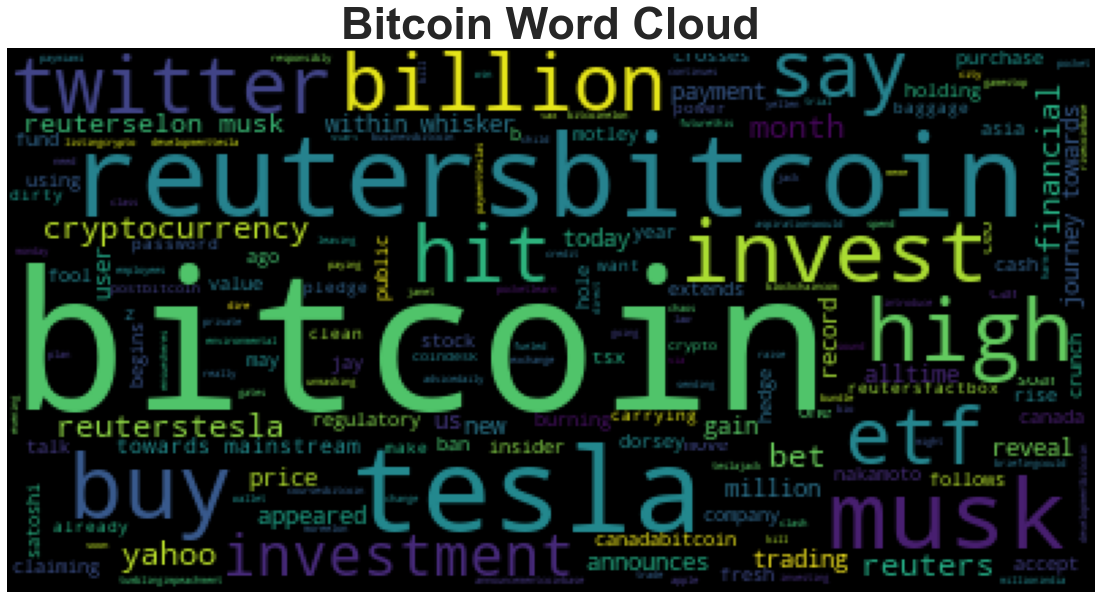

In [36]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(' '.join(btc_token))
plt.title("Bitcoin Word Cloud", fontsize = 45, fontweight = 'bold')
plt.axis('off')

plt.imshow(btc_wc)

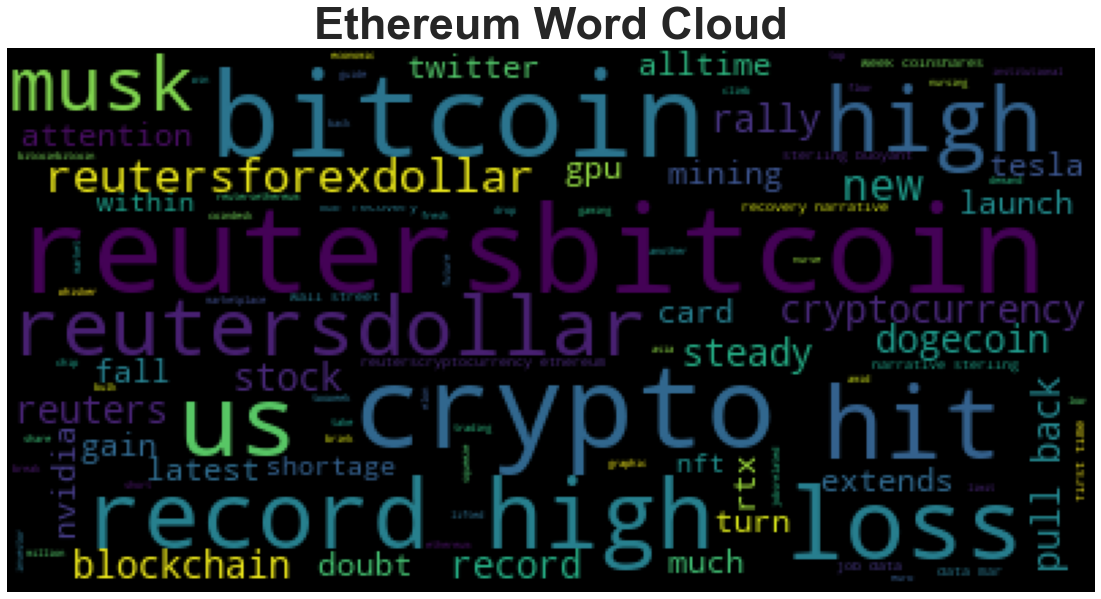

In [37]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(' '.join(eth_token))
plt.title("Ethereum Word Cloud", fontsize = 45, fontweight = 'bold')
plt.axis('off')

plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [38]:
import spacy
from spacy import displacy

In [40]:
# Optional - download a language model for SpaCy
#!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [41]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Bitcoin NER

In [43]:
# Concatenate all of the bitcoin text together
btc_text = ' '.join(btc_ss_df['Text'])

btc_text

'Tesla buys $1.5 in Bitcoin, will soon accept it as payment Tesla’s $1.5 billion bitcoin purchase clashes with its environmental aspirations Would You Trade a Bitcoin for a Tesla? Jack Dorsey and Jay Z invest $23.6 million to fund Bitcoin development Tesla buys $1.5B in bitcoin, may accept the cryptocurrency as payment in the future This Cryptocurrency Is Really Burning a Hole in My Pocket Learn how to responsibly invest in Bitcoin with this bundle of courses Bitcoin Continues to Soar, Fueled by Tesla Announcement Coinbase says unmasking Satoshi Nakamoto might harm its business Bitcoin Hit All-Time High at Over $50,000, Leaving Us in Dire Need of Sound Financial Advice Daily Crunch: Jack Dorsey and Jay Z invest in bitcoin development Bitcoin Burning a Hole in Your Pocket? Now You Can Spend It Using Apple Pay Miami May Start Paying City Employees in Bitcoin Elon Musk changes Twitter bio to #bitcoin, chaos ensues Here\'s how you could win $8,000 in Bitcoin, investing classes, and more El

In [45]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text)

# Add a title to the document
btc_ner.user_data["title"] = "Bitcoin NER"

In [47]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [48]:
# List all Entities
for ent in btc_ner.ents:
    print(ent.text, ent.label_)

Tesla ORDINAL
1.5 MONEY
Bitcoin GPE
Tesla TIME
$1.5 billion MONEY
Tesla ORDINAL
Jack Dorsey PERSON
Jay Z PERSON
$23.6 million MONEY
Bitcoin GPE
Tesla ORDINAL
Bitcoin GPE
Bitcoin GPE
Tesla Announcement Coinbase ORG
Satoshi Nakamoto PERSON
Bitcoin Hit All-Time High FAC
Over $50,000 MONEY
Jack Dorsey PERSON
Jay Z PERSON
Bitcoin Burning a Hole in Your Pocket? WORK_OF_ART
Miami GPE
Bitcoin Elon NORP
Twitter ORG
8,000 MONEY
Bitcoin GPE
Elon Musk ORG
Bill Gates PERSON
Janet Yellen PERSON
Impeachment Trial PERSON
Child Tax Credit ORG
Bitcoin GPE
Monday DATE
Evening TIME
Crypto GPE
Blockchain.com ORG
$120 million MONEY
India GPE
Bitcoin GPE
Daily Crunch: WORK_OF_ART
DoorDash PRODUCT
Chowbotics Coinbase WORK_OF_ART
Bitcoin GPE
above $47,000 MONEY
Asia - Reuters Bitcoin LOC
above $47,000 MONEY
Asia - Reuters Tesla DATE
Elon Musk ORG
Bitcoin Purchase PERSON
Less Dumb WORK_OF_ART
Cops ORG
60 MONEY
Tesla ORDINAL
a month ago DATE
Tesla ORDINAL
a month ago DATE
Reuters ORG
UK GPE
FOREX-Dollar ORG
U.S.

## Ethereum NER

In [49]:
# Concatenate all of the bitcoin text together
eth_text = ' '.join(eth_ss_df['Text'])

eth_text

"NVIDIA limits RTX 3060 crypto speeds as it introduces mining cards Coinbase is going public via direct listing Ethereum scales record peak before futures launch - Reuters Cryptocurrency Ethereum hits record high ahead of CME futures launch - Reuters Canada Remastered 'nyan cat' art sells for the equivalent of $605k Nvidia Is Making Graphics Cards Just for Cryptocurrency Miners Bitcoin extends gains above $47,000 in Asia - Reuters Bitcoin extends gains above $47,000 in Asia - Reuters Cryptocurrency Ethereum hits record high, lifted by bitcoin, institutional demand - Reuters Cryptocurrency Ethereum hits record high, lifted by bitcoin, institutional demand - Reuters Elon Musk, back on Twitter, turns his support to Dogecoin - Reuters FOREX-Dollar steadies after U.S. jobs-related losses - Reuters Bitcoin and Ethereum - Weekly Technical Analysis – February 22nd, 2021 - FX Empire Coinbase says unmasking Satoshi Nakamoto might harm its business UPDATE 2-Elon Musk, back on Twitter, turns his a

In [50]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_text)

# Add a title to the document
eth_ner.user_data["title"] = "Ethereum NER"

In [51]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [52]:
# List all Entities
for ent in eth_ner.ents:
    print(ent.text, ent.label_)

RTX 3060 PRODUCT
Reuters Cryptocurrency Ethereum ORG
CME ORG
Reuters Canada Remastered ' ORG
nyan cat' PERSON
605k MONEY
Bitcoin GPE
above $47,000 MONEY
Asia - Reuters Bitcoin LOC
above $47,000 MONEY
Asia - Reuters Cryptocurrency Ethereum ORG
Reuters Cryptocurrency Ethereum ORG
bitcoin GPE
Twitter ORG
Dogecoin - Reuters FOREX-Dollar ORG
U.S. GPE
Reuters Bitcoin ORG
Ethereum - Weekly Technical Analysis ORG
February 22nd, DATE
Satoshi Nakamoto PERSON
Twitter ORG
Dogecoin - Reuters Ethereum ORG
latest week DATE
CoinShares - Reuters Bitcoin ORG
latest week DATE
Reuters Bitcoin ORG
50,000 MONEY
8,000 MONEY
Bitcoin GPE
Bitcoin GPE
50,000 MONEY
Bitcoin GPE
as much as 6% PERCENT
Reuters Dollar ORG
Blockchain ORG
20 MONEY
Bitcoin GPE
weekend DATE
Reuters Dollar ORG
Reuters Dollar ORG
as much as 6% PERCENT
Reuters China ORG
Elon Musk PERSON
Bill Gates PERSON
Janet Yellen PERSON
Elon Musk's PERSON
$15 billion MONEY
Tesla ORDINAL
9% PERCENT
one day DATE
10,000 MONEY
BTC ORG
ETH ORG
10% PERCENT
Tes